# Agglomertaive Clustering

Understand the algorithm used to implement Algorative Clustering


In [40]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Compute the linkage distance

Compute the distance between two clusters based on the specified linkage method.
    
Parameters:
  - X: Data array (n_samples, n_features).
  - cluster_a, cluster_b: Lists of indices for points in each cluster.
  - linkage: Linkage method ('single', 'complete', 'average', 'centroid').
    
Returns:
  - Distance between clusters.

In [41]:
def compute_linkage_distance(X, cluster_a, cluster_b, linkage):
    if linkage == 'centroid':
        centroid_a = np.mean(X[cluster_a], axis=0)
        centroid_b = np.mean(X[cluster_b], axis=0)
        return np.linalg.norm(centroid_a - centroid_b)

    dists = cdist(X[cluster_a], X[cluster_b])
    if linkage == 'single':
        return np.min(dists)
    elif linkage == 'complete':
        return np.max(dists)
    elif linkage == 'average':
        return np.mean(dists)
    else:
        raise ValueError(f"Unsupported linkage: {linkage}")

# Agglomerative Clustering

Perform agglomerative hierarchical clustering on the input data.

Parameters:
  - X: Data array (n_samples, n_features).
  - n_clusters: Number of clusters to return labels for (1 to n_samples).
  - linkage: Linkage method ('single', 'complete', 'average', 'centroid').

Returns:
  - labels: Array of cluster labels for each point at n_clusters.
  - linkage_matrix: Complete linkage matrix (n-1 rows) for dendrogram.

In [48]:
def agglomerative_clustering(X, n_clusters=1, linkage='single'):
    n = len(X)
    clusters = [[i] for i in range(n)]  # Each point starts as its own cluster
    linkage_matrix = []
    active_clusters = list(range(n))  # Indices of active clusters
    cluster_labels = {}  # Store labels at desired n_clusters

    while len(active_clusters) > 1:
        # Find the two closest clusters
        min_dist = np.inf
        pair = (None, None)
        for i in range(len(active_clusters)):
            for j in range(i + 1, len(active_clusters)):
                a, b = active_clusters[i], active_clusters[j]
                d = compute_linkage_distance(
                    X, clusters[a], clusters[b], linkage)
                if d < min_dist:
                    min_dist = d
                    pair = (a, b)

        if pair[0] is None or pair[1] is None:
            break

        a, b = pair
        new_cluster = clusters[a] + clusters[b]
        linkage_matrix.append([a, b, min_dist, len(new_cluster)])

        clusters.append(new_cluster)
        active_clusters.remove(a)
        active_clusters.remove(b)
        new_cluster_id = n + len(linkage_matrix) - 1
        active_clusters.append(new_cluster_id)

        # Store labels when reaching desired n_clusters
        if len(active_clusters) == n_clusters:
            labels = np.empty(n, dtype=int)
            for label, cluster_id in enumerate(active_clusters):
                for pt in clusters[cluster_id]:
                    labels[pt] = label
            cluster_labels[n_clusters] = labels

    # Ensure labels for n_clusters=1
    if n_clusters == 1 or n_clusters not in cluster_labels:
        labels = np.empty(n, dtype=int)
        for label, cluster_id in enumerate(active_clusters):
            for pt in clusters[cluster_id]:
                labels[pt] = label
        cluster_labels[n_clusters] = labels

    return cluster_labels[n_clusters], np.array(linkage_matrix, dtype=float)

In [43]:
def validate_linkage_matrix(Z, n):
    """
    Validate the linkage matrix to ensure no cluster is used before it is defined.

    Parameters:
    - Z: Linkage matrix (n-1, 4).
    - n: Number of samples.

    Returns:
    - True if valid, False otherwise.
    """
    defined_clusters = set(range(n))
    for i, row in enumerate(Z):
        c1, c2, dist, size = row
        if c1 >= n and c1 not in defined_clusters:
            print(f"Error: Cluster {c1} used in row {i} before it is defined")
            return False
        if c2 >= n and c2 not in defined_clusters:
            print(f"Error: Cluster {c2} used in row {i} before it is defined")
            return False
        defined_clusters.add(n + i)
    return True

In [44]:
def plot_dendrogram(linkage_matrix, n_clusters=1):
    """
    Plot a dendrogram from the linkage matrix, showing the specified number of clusters.

    Parameters:
    - linkage_matrix: Linkage matrix (n-1, 4).
    - n_clusters: Number of clusters to display in the dendrogram.
    """
    if linkage_matrix.shape[0] == 0 or linkage_matrix.shape[1] != 4:
        print(
            "Invalid linkage matrix format. Must be non-empty and have 4 columns: [cluster1, cluster2, distance, size].")
        return
    n = int(linkage_matrix.shape[0] + 1)
    if not validate_linkage_matrix(linkage_matrix, n):
        print("Linkage matrix validation failed.")
        return
    plt.figure(figsize=(10, 5))
    dendrogram(linkage_matrix, truncate_mode='lastp', p=n_clusters)
    plt.title(
        f"Hierarchical Clustering Dendrogram (Showing {n_clusters} Clusters)")
    plt.xlabel("Sample Index or Cluster Size")
    plt.ylabel("Distance")
    plt.show()

Linkage Matrix for first dataset: 99


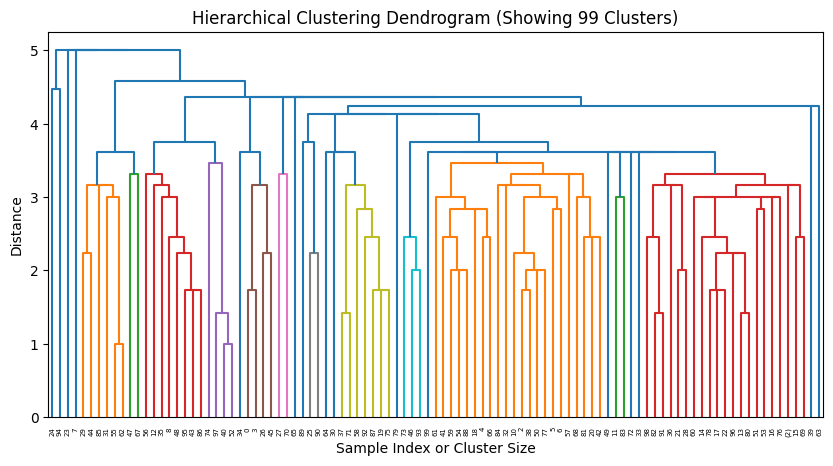

In [45]:
# Concepts, 3 features 5 points
np.random.seed(1024)
X = np.random.randint(-10, 10, size=(100, 3))
labels, linkages = agglomerative_clustering(X, 1, "single")
print("Linkage Matrix for first dataset:", len(linkages))
plot_dendrogram(linkages, 99)

Linkage Matrix for second dataset: 9


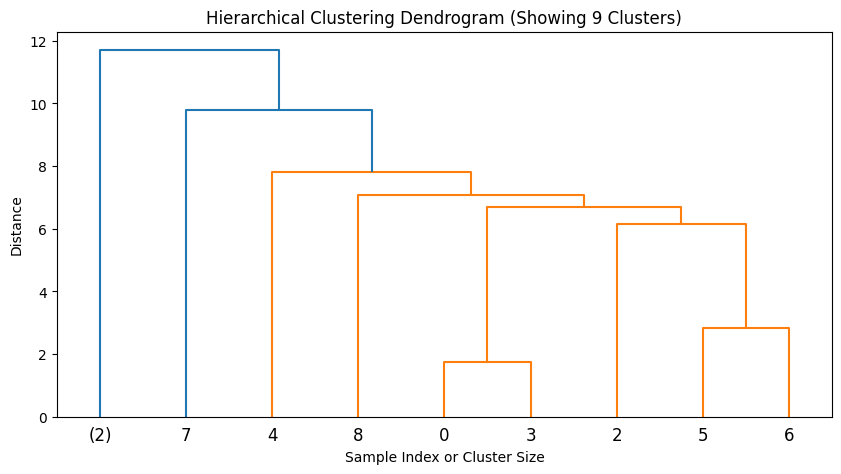

In [46]:
# Test
np.random.seed(1024)
X = np.random.randint(-10, 10, size=(10, 3))
labels, linkages = agglomerative_clustering(X, linkage='single', n_clusters=1)
print("Linkage Matrix for second dataset:", len(linkages))
plot_dendrogram(linkages, 9)


Labels for second dataset: [0 0 0 0 0 0]
Linkage Matrix for second dataset: 5


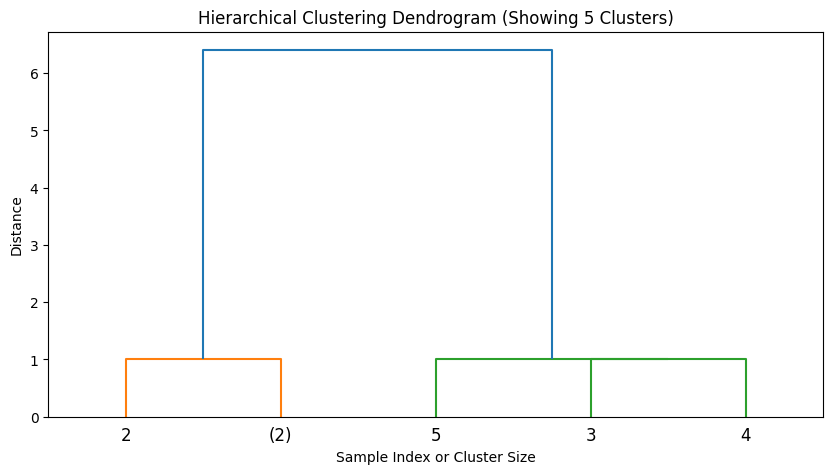

In [47]:

# Additional Test Case
X2 = np.array([[0, 0], [0, 1], [1, 0], [5, 5], [6, 5], [5, 6]])
labels2, linkages2 = agglomerative_clustering(X2, linkage='single', n_clusters=1)
print("\nLabels for second dataset:", labels2)
print("Linkage Matrix for second dataset:", len(linkages2))
plot_dendrogram(linkages2, 5)